In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#初始化数据集
n = 20
X = np.linspace(0,1,n)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y_O = np.sin(2*np.pi*X)   # y = sin(x)
Y = Y_O +  np.random.normal(0,0.2,n) # 目标值 + 噪音（符合高斯分布）

In [3]:
# 采用 close form solution方法求系数 w 的值
# 线性方程为 y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
def calc_w(m,X,Y):
    i = 0
    for x in X:
        for j in range(m):
            fi[i][j] = pow(x,j)
        i = i + 1
    fi_t = fi.transpose()
    w = np.dot(np.dot(np.linalg.inv(np.dot(fi_t,fi)),fi_t),Y)  # 应用求系数的公式
    return w.reshape(-1,1)

In [4]:
def calc_error(n,m,w,X,Y):
    squared_error = 0
    for i in range(n):
        error = calc_single_error(m,w,X[i],Y[i])
        squared_error += error**2
    return squared_error/2

In [5]:
def calc_single_error(m,w,x,y):
    pre_value = 0
    for i in range(m):
        pre_value += w[i][0]*pow(x,i)
    error = pre_value - y
    return error

In [6]:
# 采用 close form solution方法求系数 w 的值
# 线性方程为 y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
order = 9
m = order + 1
fi = np.zeros((n,m)) # 
w = calc_w(m,X,Y)
error = calc_error(n,m,w,X,Y)
print(error)

0.38420802103985213


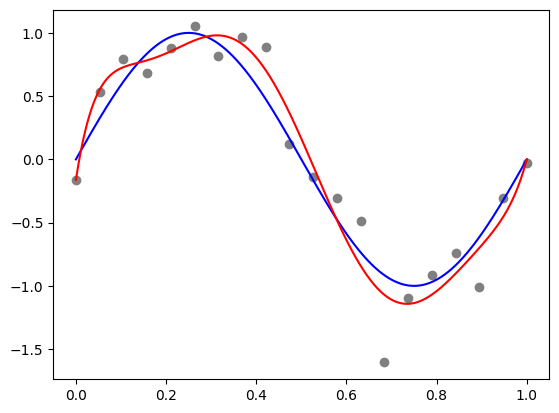

In [7]:
#绘制样例数据
plt.scatter(X,Y,color='grey')

#绘制原始曲线： y = sin(x)曲线
n1 = 500
X_1 = np.linspace(0,1,n1)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y_1 = np.sin(2*np.pi*X_1)   # y = sin(x)
plt.plot(X_1,Y_1,color='blue')

# #绘制拟合函数线性函数的曲线：y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
Y_2 = []
for x in X_1:
    y = 0
    for j in range(m):
        y += w[j][0]*pow(x,j)  
    Y_2.append(y) 
plt.plot(X_1,Y_2,color='red')